In [1]:
import pandas as pd

In [2]:
df=pd.read_excel('heart_disease.xlsx',sheet_name ='Heart_disease')
df.describe()

,age,trestbps,chol,thalch,oldpeak,num
count,908.000000,908.000000,908.000000,908.000000,846.000000,908.000000
mean,53.791850,133.430617,201.484581,135.957048,0.891253,1.008811
std,9.158031,20.401608,112.097949,26.804929,1.093875,1.144436
min,29.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.750000,120.000000,176.750000,118.000000,0.000000,0.000000
50%,54.000000,130.000000,224.000000,138.000000,0.500000,1.000000
75%,60.000000,144.000000,270.000000,156.000000,1.500000,2.000000
max,77.000000,200.000000,603.000000,202.000000,6.200000,4.000000


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 908 entries, 0 to 907
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       908 non-null    int64  
 1   sex       908 non-null    object 
 2   cp        908 non-null    object 
 3   trestbps  908 non-null    int64  
 4   chol      908 non-null    int64  
 5   fbs       908 non-null    bool   
 6   restecg   908 non-null    object 
 7   thalch    908 non-null    int64  
 8   exang     908 non-null    object 
 9   oldpeak   846 non-null    float64
 10  slope     908 non-null    object 
 11  thal      908 non-null    object 
 12  num       908 non-null    int64  
dtypes: bool(1), float64(1), int64(5), object(6)
memory usage: 86.1+ KB


In [4]:
# Check for unique values in each column (especially categorical variables)
print(df.nunique())
print(df['exang'].unique())

age          49
sex           2
cp            4
trestbps     85
chol        228
fbs           2
restecg       3
thalch      122
exang         4
oldpeak      53
slope         3
thal          3
num           5
dtype: int64
[False True 'FALSE' 'TURE']


In [5]:
df['exang'] = df['exang'].replace(['FALSE'], False )
df['exang'] = df['exang'].replace(['TURE'], True )

C:\Users\dhivya.dharani\AppData\Local\Temp\ipykernel_24048\4277443142.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['exang'] = df['exang'].replace(['TURE'], True )


In [6]:

missing_values = df.isnull().sum()
print(missing_values)

age          0
sex          0
cp           0
trestbps     0
chol         0
fbs          0
restecg      0
thalch       0
exang        0
oldpeak     62
slope        0
thal         0
num          0
dtype: int64


In [7]:
df.fillna('0', inplace=True)
missing_values = df.isnull().sum()
print(missing_values)

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalch      0
exang       0
oldpeak     0
slope       0
thal        0
num         0
dtype: int64


C:\Users\dhivya.dharani\AppData\Local\Temp\ipykernel_24048\505323283.py:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '0' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df.fillna('0', inplace=True)


In [8]:
from sklearn.preprocessing import LabelEncoder
from sklearn import preprocessing 
label_encoder = preprocessing.LabelEncoder()
df['cp'] = label_encoder.fit_transform(df['cp'])
df['sex'] = label_encoder.fit_transform(df['sex'])
df['fbs'] = label_encoder.fit_transform(df['fbs'])
df['restecg'] = label_encoder.fit_transform(df['restecg'])
df['exang'] = label_encoder.fit_transform(df['exang'])
df['slope'] = label_encoder.fit_transform(df['slope'])
df['thal'] = label_encoder.fit_transform(df['thal'])
# df['oldpeak'] = label_encoder.fit_transform(df['oldpeak'])

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 908 entries, 0 to 907
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   age       908 non-null    int64 
 1   sex       908 non-null    int64 
 2   cp        908 non-null    int64 
 3   trestbps  908 non-null    int64 
 4   chol      908 non-null    int64 
 5   fbs       908 non-null    int64 
 6   restecg   908 non-null    int64 
 7   thalch    908 non-null    int64 
 8   exang     908 non-null    int64 
 9   oldpeak   908 non-null    object
 10  slope     908 non-null    int64 
 11  thal      908 non-null    int64 
 12  num       908 non-null    int64 
dtypes: int64(12), object(1)
memory usage: 92.3+ KB


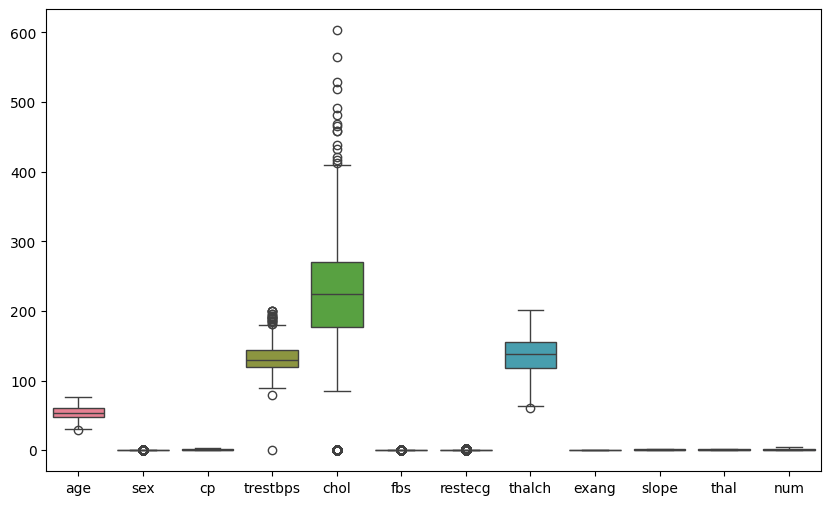

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualize outliers using box plots
plt.figure(figsize=(10, 6))
sns.boxplot(data=df)
plt.show()

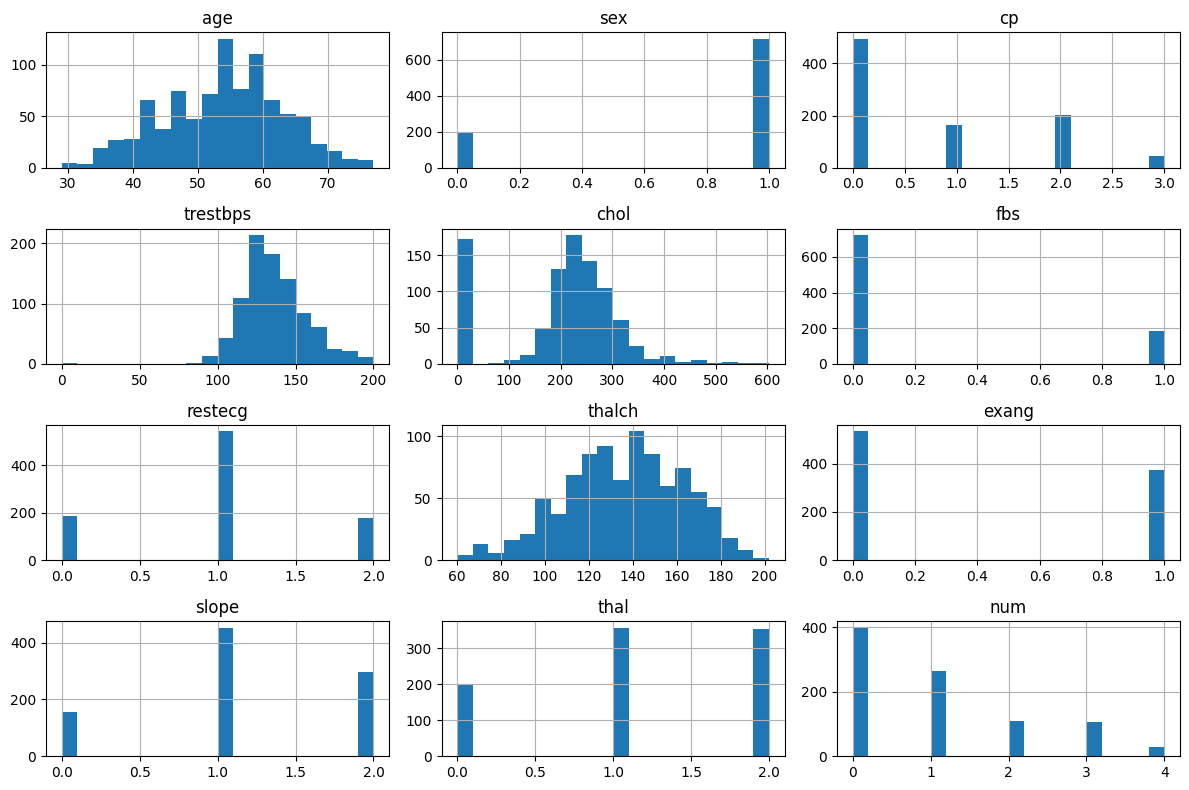

In [10]:
# Plot histograms for all numeric features
df.hist(figsize=(12, 8), bins=20)
plt.tight_layout()
plt.show()

In [11]:
# df = pd.get_dummies(df, columns=['sex'], prefix='sex')
# print(df)

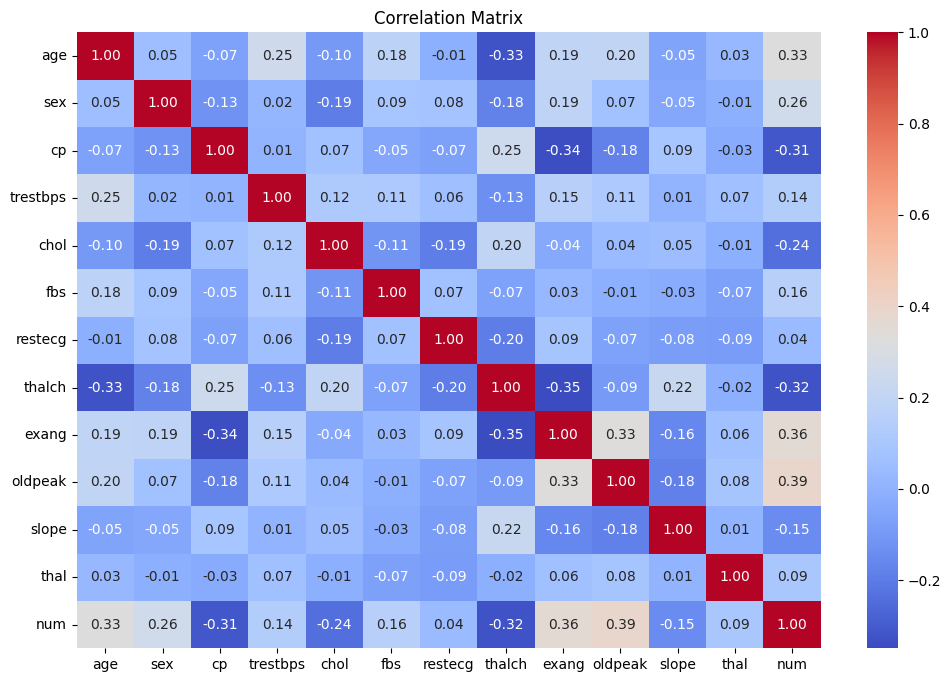

In [12]:
# Compute and visualize the correlation matrix
correlation_matrix = df.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Matrix")
plt.show()

In [13]:
from sklearn.preprocessing import StandardScaler
import numpy as np

scaler = StandardScaler()
scaled_features = scaler.fit_transform(df.select_dtypes(include=[np.number]))
data_scaled = pd.DataFrame(scaled_features, columns=df.select_dtypes(include=[np.number]).columns)
data_scaled

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,slope,thal,num
0,1.006027,0.514416,2.320276,0.567394,0.281297,1.976894,-1.561352,0.524183,-0.834983,-1.672770,-1.540284,-0.881977
1,-1.397560,0.514416,0.232258,0.076967,0.013526,-0.505844,0.013879,-0.147705,-0.834983,-0.224843,-1.540284,-0.881977
2,0.350503,0.514416,-0.811752,0.322181,-0.084656,-0.505844,0.013879,0.449529,-0.834983,-0.224843,-1.540284,-0.881977
3,-0.195767,0.514416,2.320276,-0.756760,-0.138211,-0.505844,-1.561352,2.017268,-0.834983,-0.224843,-1.540284,-0.881977
4,0.350503,0.514416,-0.811752,-1.149102,-0.004325,-0.505844,0.013879,-0.371668,1.197629,-0.224843,-1.540284,-0.881977
...,...,...,...,...,...,...,...,...,...,...,...,...
903,-0.086513,0.514416,-0.811752,-0.413461,-1.798388,-0.505844,0.013879,-0.595631,-0.834983,1.223083,1.091095,2.615119
904,0.896773,0.514416,-0.811752,1.597292,-0.281021,-0.505844,1.589110,-0.595631,1.197629,-0.224843,-0.224595,2.615119
905,0.241249,0.514416,1.276267,1.793463,-1.798388,-0.505844,-1.561352,-0.483649,1.197629,-1.672770,-1.540284,2.615119
906,0.241249,0.514416,1.276267,0.518352,0.058155,1.976894,1.589110,-1.155538,1.197629,-1.672770,-1.540284,2.615119


In [14]:
from sklearn.preprocessing import MinMaxScaler

minmax_scaler = MinMaxScaler()
normalized_features = minmax_scaler.fit_transform(df.select_dtypes(include=[np.number]))
data_normalized = pd.DataFrame(normalized_features, columns=df.select_dtypes(include=[np.number]).columns)
data_normalized

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,slope,thal,num
0,0.708333,1.0,1.000000,0.725,0.386401,1.0,0.0,0.633803,0.0,0.0,0.0,0.0
1,0.250000,1.0,0.333333,0.675,0.336650,0.0,0.5,0.507042,0.0,0.5,0.0,0.0
2,0.583333,1.0,0.000000,0.700,0.318408,0.0,0.5,0.619718,0.0,0.5,0.0,0.0
3,0.479167,1.0,1.000000,0.590,0.308458,0.0,0.0,0.915493,0.0,0.5,0.0,0.0
4,0.583333,1.0,0.000000,0.550,0.333333,0.0,0.5,0.464789,1.0,0.5,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
903,0.500000,1.0,0.000000,0.625,0.000000,0.0,0.5,0.422535,0.0,1.0,1.0,1.0
904,0.687500,1.0,0.000000,0.830,0.281924,0.0,1.0,0.422535,1.0,0.5,0.5,1.0
905,0.562500,1.0,0.666667,0.850,0.000000,0.0,0.0,0.443662,1.0,0.0,0.0,1.0
906,0.562500,1.0,0.666667,0.720,0.344942,1.0,1.0,0.316901,1.0,0.0,0.0,1.0


In [15]:
# Compute correlations with the target variable (assuming 'num' is the target)
correlation_with_target = df.corr()['num'].abs().sort_values(ascending=False)

# Select features with correlation above a threshold (e.g., 0.3)
selected_features = correlation_with_target[correlation_with_target > 0.3]
print(selected_features)

num        1.000000
oldpeak    0.387987
exang      0.359549
age        0.326493
thalch     0.323058
cp         0.312848
Name: num, dtype: float64


In [16]:
from sklearn.model_selection import train_test_split

# Define features (X) and target (y)
X = df.drop(columns=['num'])  # Replace 'num' with the actual target column
y = df['num']

# Split dataset into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training Set Size:", X_train.shape)
print("Testing Set Size:", X_test.shape)

Training Set Size: (726, 12)
Testing Set Size: (182, 12)


In [17]:
from sklearn.tree import DecisionTreeClassifier

# Initialize the Decision Tree model
dt_classifier = DecisionTreeClassifier(random_state=42)

# Train the model on the training set
dt_classifier.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [18]:
# Make Predictions

# Predict on the testing set
y_pred = dt_classifier.predict(X_test)

In [19]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, classification_report

# Accuracy
accuracy = accuracy_score(y_test, y_pred)

# Precision, Recall, F1-Score
precision = precision_score(y_test, y_pred, average='weighted')  # Adjust 'average' for multiclass
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# Display results
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-Score:", f1)
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.5
Precision: 0.49739403453689174
Recall: 0.5
F1-Score: 0.49863615264659406

Classification Report:
               precision    recall  f1-score   support

           0       0.73      0.73      0.73        89
           1       0.38      0.40      0.39        48
           2       0.29      0.27      0.28        22
           3       0.06      0.06      0.06        17
           4       0.00      0.00      0.00         6

    accuracy                           0.50       182
   macro avg       0.29      0.29      0.29       182
weighted avg       0.50      0.50      0.50       182



In [29]:
# Example: ROC-AUC for binary classification
y_prob = dt_classifier.predict_proba(X_test)

print(y_test,y_prob)
roc_auc = roc_auc_score(y_test, y_prob,multi_class='ovo')
# print("ROC-AUC Score:", roc_auc)


865    3
439    1
342    0
736    2
785    3
      ..
580    1
868    3
445    1
786    3
25     0
Name: num, Length: 182, dtype: int64 [[1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 0. 0. 1. 0.]
 [0. 0. 1. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0.]
 [1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0.]
 [1. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]


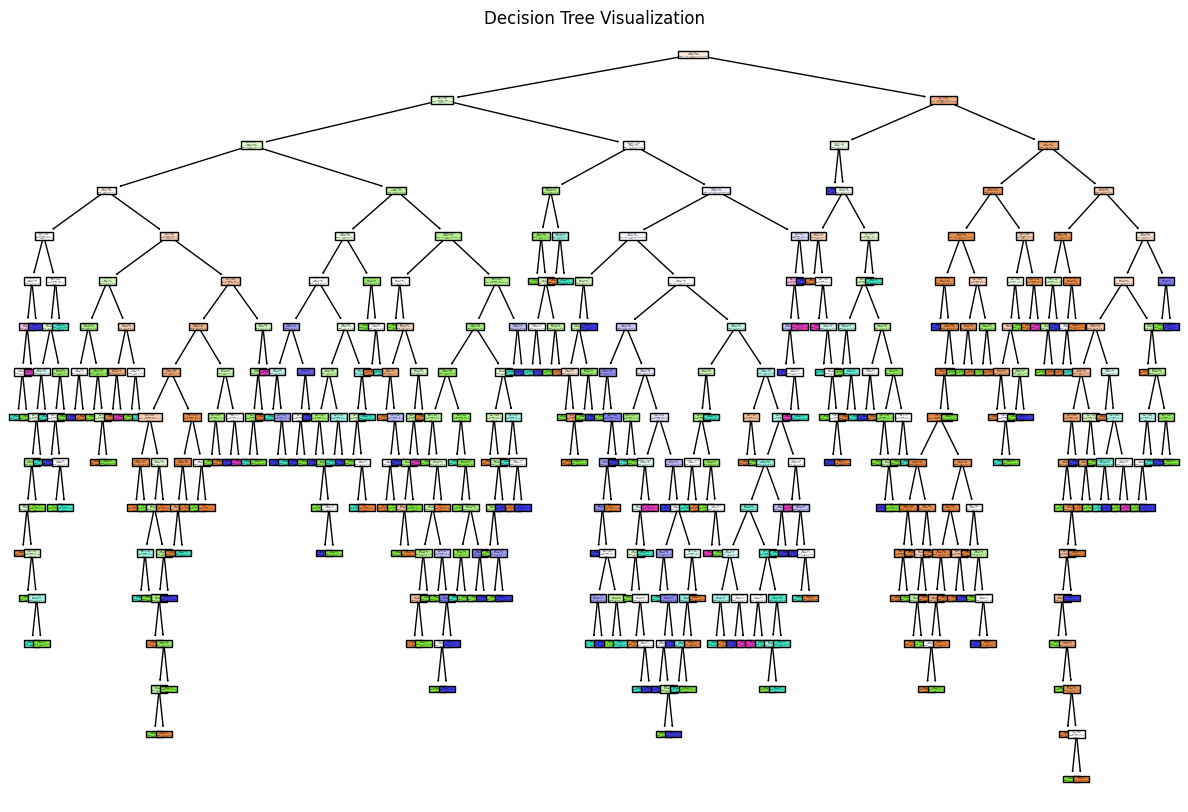

In [37]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
plt.figure(figsize=(15, 10))
feature_names1=X.columns.tolist()
class_names = [str(cls) for cls in y.unique()]  
plot_tree(dt_classifier, feature_names=feature_names1, class_names=class_names, filled=True)
plt.title("Decision Tree Visualization")
plt.show()

In [38]:
# Use GridSearchCV or RandomizedSearchCV to tune hyperparameters
from sklearn.model_selection import GridSearchCV

param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [3, 5, 10, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
grid_search = GridSearchCV(estimator=dt_classifier, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)
print("Best Parameters:", grid_search.best_params_)
best_model = grid_search.best_estimator_


Best Parameters: {'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 4, 'min_samples_split': 2}


In [39]:
# Model Evaluation and Analysis
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, best_model.predict(X_test)))

[[70 14  4  1  0]
 [19 25  4  0  0]
 [ 3 14  3  2  0]
 [ 7  5  4  1  0]
 [ 0  5  1  0  0]]


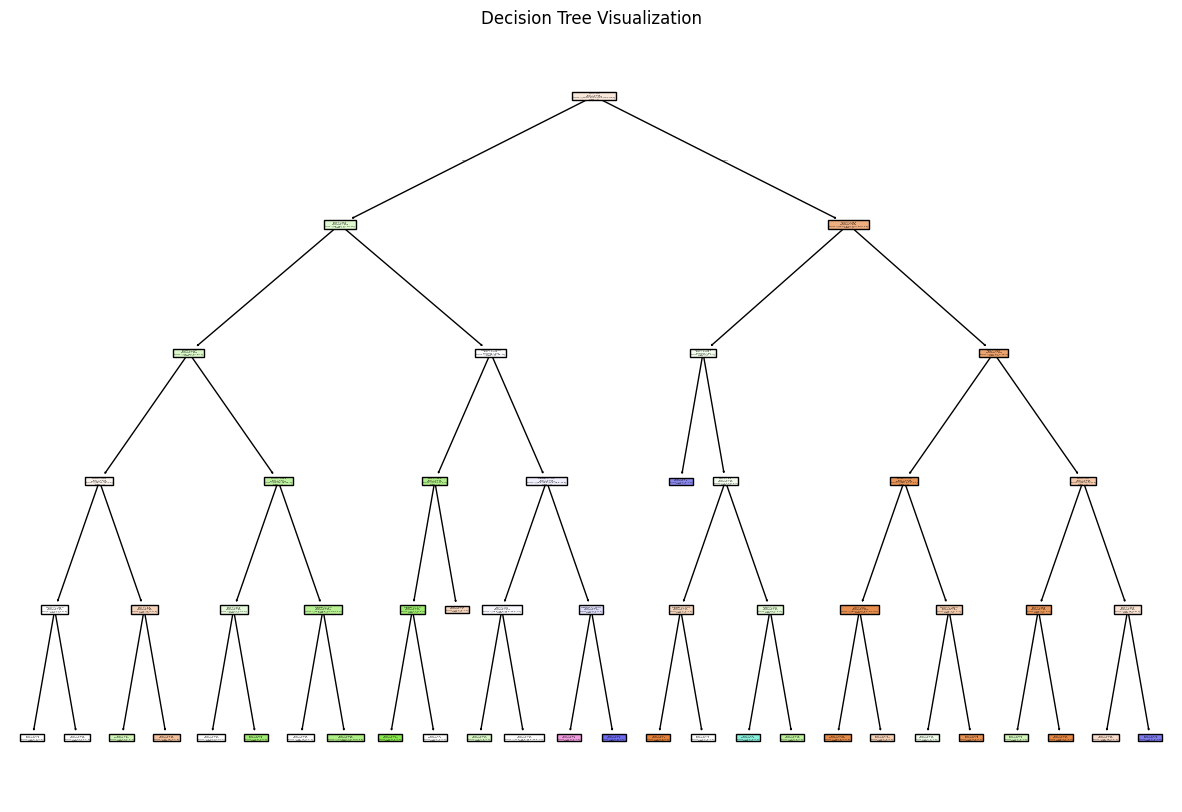

In [40]:
from sklearn.tree import plot_tree
plt.figure(figsize=(15, 10))
plot_tree(best_model, feature_names=X.columns, class_names=[str(cls) for cls in y.unique()], filled=True)
plt.title("Decision Tree Visualization")
plt.show()

In [41]:
importances = best_model.feature_importances_
feature_importances = pd.DataFrame({'Feature': X.columns, 'Importance': importances})
print(feature_importances.sort_values(by='Importance', ascending=False))

     Feature  Importance
2         cp    0.376729
4       chol    0.168233
0        age    0.155192
8      exang    0.074702
9    oldpeak    0.060436
7     thalch    0.042444
1        sex    0.039886
3   trestbps    0.036806
11      thal    0.033992
10     slope    0.011580
6    restecg    0.000000
5        fbs    0.000000


Most Important Features:

cp (chest pain type): This is the most influential feature, contributing significantly to the decision-making process.
chol (cholesterol) and age: Also highly impactful.

Moderate Importance:

exang (exercise-induced angina) and oldpeak (ST depression) have a moderate influence.

Least Important Features:

restecg (resting ECG results) and fbs (fasting blood sugar) have zero importance, indicating they do not contribute to the model's predictions.


Interview Questions:

1. What are some common hyperparameters of decision tree models, and how do they affect the model's performance?

Criterion -- Specifies the function to measure the quality of a split. Options: 'gini' (default) or 'entropy'.

max_depth -- The maximum depth of the tree.

min_samples_split -- The minimum number of samples required to split an internal node.

min_samples_leaf -- The minimum number of samples required to be at a leaf node.

max_features -- The maximum number of features considered for a split.

max_leaf_nodes -- Limits the number of leaf nodes in the tree.

min_impurity_decrease -- A node will split only if the impurity decrease is at least this value.

splitter -- Strategy used to split nodes: 'best' (default) or 'random'.


2. What is the difference between the Label encoding and One-hot encoding?

Label Encoding:

Converts categorical values into integer labels.

Each category gets a unique integer.

Example: If a column has colors ["Red", "Green", "Blue"], it will be encoded as [0, 1, 2].

When to use: When the categories have a natural order (e.g., "Low", "Medium", "High").

Limitations: If categories are nominal (no order), the model might misinterpret the numerical encoding as ordinal relationships.

One-Hot Encoding:

Converts categorical values into multiple binary columns.

Each category becomes its own column with values 0 or 1.

Example: If a column has colors ["Red", "Green", "Blue"], it will be transformed into three columns: [Red, Green, Blue] with values like [1, 0, 0], [0, 1, 0], and [0, 0, 1].

When to use: When categories are nominal and do not have a meaningful order.

Limitations: Increases the dimensionality of the dataset, which can be problematic for high-cardinality features.